In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('hoteldataset.xlsx')

In [4]:
# print(data.head())
# print(data.info())
# print(data.describe())
# print(data.isnull().sum())
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(len(data))

79811


<Axes: xlabel='Nationality'>

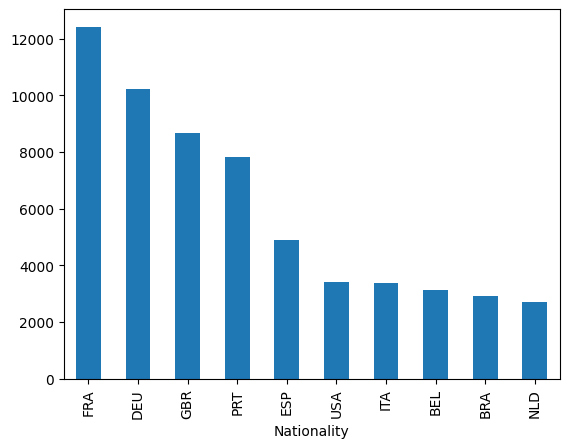

In [6]:
data['Nationality'].value_counts()[0:10].plot(kind='bar')

In [60]:
data['monetary'] = data['LodgingRevenue'] + data['OtherRevenue']
#RFM data
RFM_data = data[['ID', 'monetary', 'BookingsCheckedIn', 'DaysSinceLastStay']]
print(RFM_data.head())
print(len(RFM_data))
filtered_RFM_data = RFM_data[RFM_data['monetary'] > 0]
print(len(filtered_RFM_data))
print(filtered_RFM_data['BookingsCheckedIn'].unique())

   ID  monetary  BookingsCheckedIn  DaysSinceLastStay
0   1     476.3                  3                151
2   3       0.0                  0                 -1
3   4     300.0                  1               1100
4   5       0.0                  0                 -1
5   6     254.0                  1               1097
79811
60540
[ 3  1  9 11  2  7  8  5  6  4 66 15 29 25 10 17 13 26 23 12 57 40 18 14
 24 20 34]


In [82]:
#RFM
rfm = filtered_RFM_data.copy()
rfm['monetary'] = rfm['monetary'].astype(int)
rfm['BookingsCheckedIn'] = rfm['BookingsCheckedIn'].astype(int)
rfm['DaysSinceLastStay'] = rfm['DaysSinceLastStay'].astype(int)
rfm['r_quartile'] = pd.qcut(rfm['DaysSinceLastStay'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.cut(rfm['BookingsCheckedIn'], bins=[0, 2, 5, 10, float('inf')], labels=['4', '3','2', '1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm['rfm_score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
print(rfm.head())


   ID  monetary  BookingsCheckedIn  DaysSinceLastStay r_quartile f_quartile  \
0   1       476                  3                151          1          3   
3   4       300                  1               1100          4          4   
5   6       254                  1               1097          4          4   
7   8       629                  1               1100          4          4   
9  10       243                  1               1098          4          4   

  m_quartile rfm_score  
0          2       132  
3          3       443  
5          3       443  
7          1       441  
9          3       443  


In [83]:
final_rfm = rfm[['ID','monetary','BookingsCheckedIn','rfm_score']]
#top customers
top_customers = final_rfm[final_rfm['rfm_score'] == '111'].sort_values('monetary', ascending=False)
print(top_customers)

          ID  monetary  BookingsCheckedIn rfm_score
20072  20073      3441                 24       111
42116  42117      3383                 11       111
3776    3777      3313                 29       111
6675    6676      3061                 29       111
6204    6205      3001                 17       111
5661    5662      2548                 25       111
11407  11408      2369                 13       111
11415  11416      2360                 23       111
8640    8641      2109                 15       111
60970  60971      2040                 20       111
66946  66947      1805                 11       111
11422  11423      1800                 12       111
61155  61156      1552                 12       111
42619  42620      1499                 12       111
2680    2681      1468                 15       111
19270  19271      1454                 14       111
22851  22852      1439                 13       111
378      379      1248                 11       111
27856  27857